### Student Details

Student Name: Ashish Sinha

Student ID:21108374

# Task 2: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers


In [1]:
# import dependencies
import numpy as np
import pandas
import matplotlib.pyplot as plt

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

#changing columns to lowercase
data.columns = [x.lower() for x in data.columns ]
# Show just the first few samples so we know it's read correctly
print(data.head(n=3))

  gender     height      weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856


### Visualise


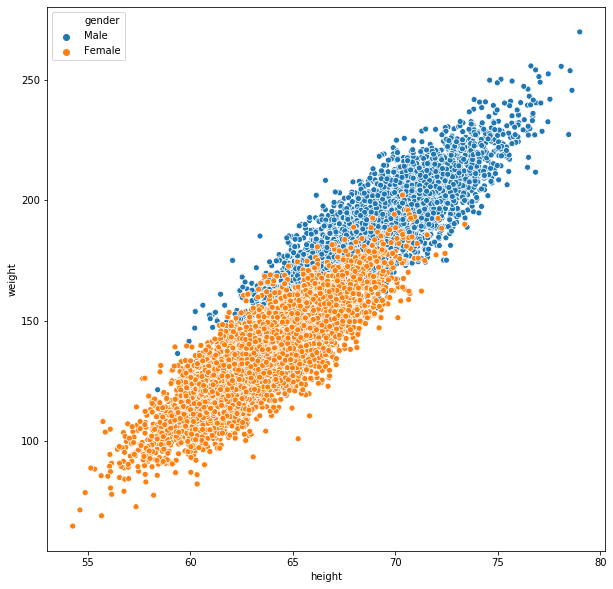

In [2]:
################################
# Your code here
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x='height',y="weight",data = data,hue = 'gender')

###### Discuss: Do you think there is resonable separation?

## Answer
I think this is a resonable separation as males are generally taller and hence weight more than females. Also there is overlap of data in male and female height and weight is because some males can be shorter than general population and females can be taller and hence may weigh more.

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [3]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting. 

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [4]:
################################
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [5]:
from sklearn.naive_bayes import GaussianNB

################################
# Your code here
gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)

### Test the algorithm
Using the test data

In [6]:
################################
# Your code here
(y_test!=y_pred).sum()

369

In [7]:
from sklearn.metrics import accuracy_score

################################
# Your code here
accuracy_score(y_test,y_pred)

0.8881818181818182

### Plot the random samples

<IPython.core.display.Javascript object>

Accuracy on new data:  0.5078787878787879


<IPython.core.display.Javascript object>

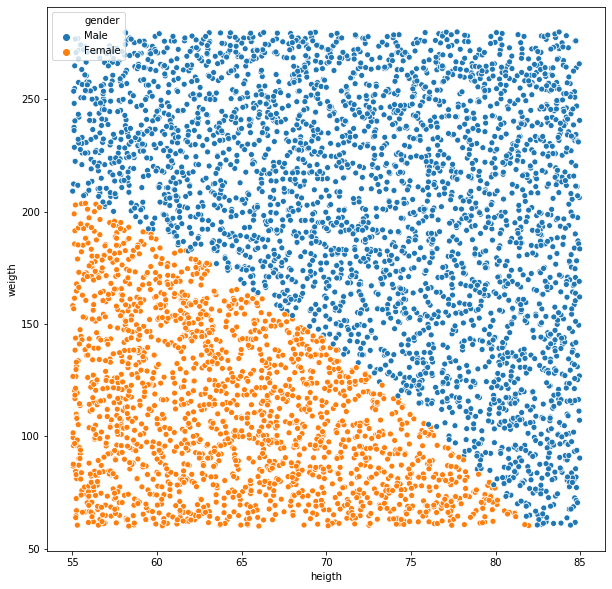

In [8]:
################################
# Your code here
np.random.seed(2)
# create random heigth and weigth from uniform data
heigth = np.random.uniform(55,85,5000)
weigth = np.random.uniform(60,280,5000)
# create new dataframe 
new_data = pd.DataFrame(list(zip(heigth,weigth)), columns = 'heigth weigth'.split())
# new prediction
new_y_pred = gnb.fit(X_train,y_train).predict(new_data)

#check the accuracy on new data
print("Accuracy on new data: ",accuracy_score(y_test,new_y_pred[:3300]))

# new dataframe with gender data
new_data = pd.DataFrame(list(zip(heigth,weigth,new_y_pred)), columns = 'heigth weigth gender'.split())
      
#plot the samples with gender hue
plt.figure(figsize=(10,10))
sns.scatterplot(x='heigth',y="weigth",data = new_data,hue = 'gender')